<a href="https://colab.research.google.com/github/OctavaOrigin/Classic-Machine-Learning/blob/main/Model_Evaluation%2C_Overfitting%2C_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import time
from datetime import datetime

In [ ]:
data_raw = pd.read_csv('athletes.csv')

In [ ]:
data_raw.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [ ]:
len(data_raw.loc[data_raw.isna().any(axis=1) == True])

680

Просто удалим их

In [ ]:
data = data_raw.loc[data_raw.isna().any(axis=1) == False]

In [ ]:
data[['height', 'weight']].corr()

,height,weight
height,1.000000,0.759037
weight,0.759037,1.000000


Великовато. Избавимся от weight

In [ ]:
del data['weight']

In [ ]:
date_format = '%m/%d/%y'
data['dob_ut'] = data['dob'].apply(lambda x: int(datetime.strptime(x, date_format).timestamp()))

<ipython-input-76-ad2473568a64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['dob_ut'] = data['dob'].apply(lambda x: int(datetime.strptime(x, date_format).timestamp()))


In [ ]:
del data['Unix time']
del data['dob']

In [ ]:
y = data['sex']
del data['sex']

In [ ]:
X = data.loc[:, (data.columns != 'id') & (data.columns != 'name')]

In [ ]:
X = pd.get_dummies(X, columns=['nationality', 'sport'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
le.fit(y)

LabelEncoder()

In [ ]:
y = pd.Series(le.transform(y))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

Text(0, 0.5, 'True Positive Rate')

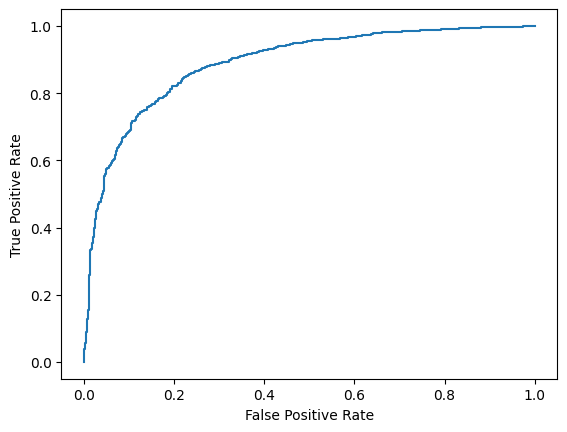

In [ ]:
plt.plot(fpr, tpr, label='ROC Curve')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred)
roc_auc

0.8884748569707919

Реализуем вручную

In [ ]:
import numpy as np

In [ ]:
y_pd = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

In [ ]:
def func(row, threshold):
  y_pred = 0
  np.array([0, 0, 0, 0]) # tp, fp, tn, fn
  if (row['y_pred'] >= threshold):
    y_pred = 1
  else:
    y_pred = 0
  if (threshold == 1):
    y_pred = 0
  if (threshold == 0):
    y_pred = 1

  if ((y_pred == row['y_test']) and (y_pred == 1)):
    return np.array([1, 0, 0, 0])
  elif ((y_pred == row['y_test']) and (y_pred == 0)):
    return (np.array([0, 0, 1, 0]))
  elif (y_pred > row['y_test']):
    return np.array([0, 1, 0, 0])
  elif (y_pred < row['y_test']):
    return np.array([0, 0, 0, 1])


thresholds = np.arange(0, 1.02, 0.01)
precision = []
fpr = []
tpr = []
for threshold in thresholds:
  tp, fp, tn, fn = y_pd[['y_test', 'y_pred']].apply(func, threshold = threshold, axis=1).sum()
  fpr.append(fp/(fp+tn))
  tpr.append(tp/(tp+fn))
  precision.append(tp/(tp+fp))

<ipython-input-145-01d628162a22>:31: RuntimeWarning: invalid value encountered in long_scalars
  precision.append(tp/(tp+fp))


Визуализируем roc-auc

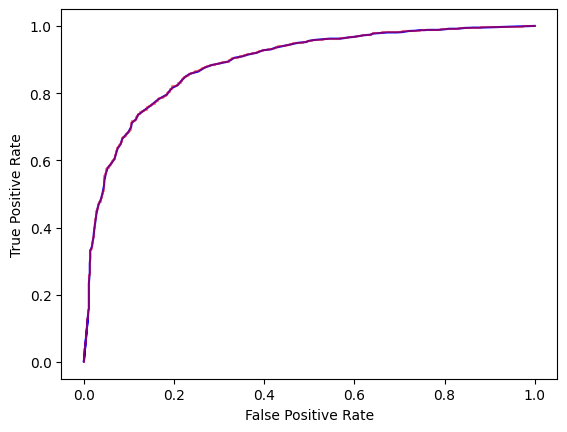

In [ ]:
plt.plot(fpr, tpr, c='b')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

fpr_, tpr_, thresholds_ = roc_curve(y_test, y_pred)
plt.plot(fpr_, tpr_, c='r', alpha=0.5)


Графики совпадают

Text(0, 0.5, 'Precision')

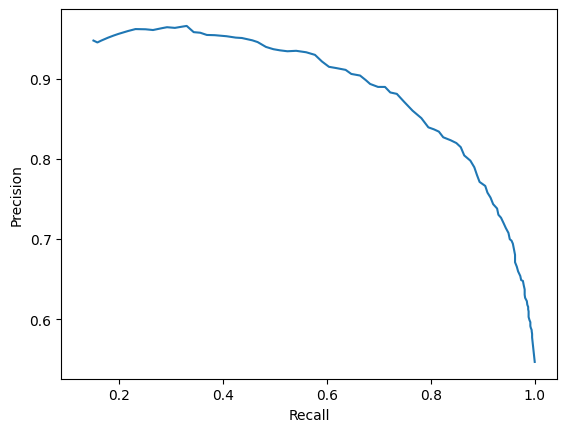

In [ ]:
plt.plot(tpr, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
